In [171]:
from datasets import load_dataset
from PIL import Image

hotdog = './images/hotdog.jpg'
not_hotdog = './images/pizza.jpg'
doxen = './images/doxen.jpg'
# sandwich = './images/sandwich.jpg'

# # Load image as PIL object
# hotdog_img = Image.open(hotdog)
not_hotdog_img = Image.open(not_hotdog)
doxen_img = Image.open(doxen)
# ds = load_dataset("food101", split="validation[:10]")
# image = ds["image"][0]
image = not_hotdog_img
# image = doxen_img

# Find the first pizza in the dataset
ds = load_dataset("food101", split="validation")

# pizza = ds.filter(lambda x: x["label"] == 63, num_proc=8)["image"][0]

# image = doxen_img


In [172]:
# image
names = ds.features['label'].names
# Find pizza in the names array
pizza_index = names.index('pizza')
hotdog_index = names.index('hot_dog')

pizzas = ds.filter(lambda x: x["label"] == pizza_index, num_proc=8)["image"]
hotdogs = ds.filter(lambda x: x["label"] == hotdog_index, num_proc=8)["image"]
image = pizzas[4]
# image = hotdogs[2]
# image = ds[3]["image"]
# image = doxen_img
# image = not_hotdog_img


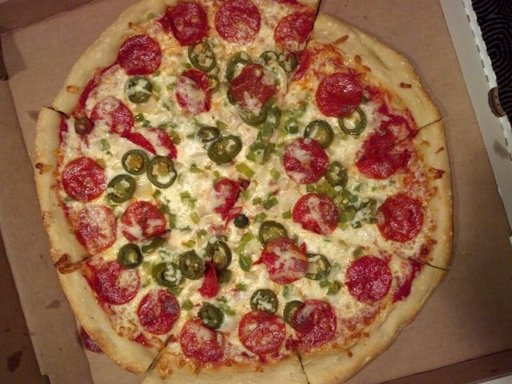

In [173]:
image

In [174]:
from transformers import pipeline

classifier = pipeline("image-classification", model="not_hotdog")
classifier(image)

[{'label': 'not_hot_dog', 'score': 0.548445463180542},
 {'label': 'hot_dog', 'score': 0.4515545666217804}]

In [175]:
from transformers import AutoImageProcessor
import torch

image_processor = AutoImageProcessor.from_pretrained("not_hotdog")
inputs = image_processor(image, return_tensors="pt")

In [176]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("not_hotdog")
with torch.no_grad():
    logits = model(**inputs).logits

In [177]:
predicted_label = logits.argmax(-1).item()
print(f'predicted_label: {predicted_label}')
model.config.id2label[predicted_label]

predicted_label: 1


'not_hot_dog'